<a href="https://colab.research.google.com/github/ToriStoner/DS4002-Project-2-/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd



In [ ]:
df = pd.read_csv("Crime Data.csv")

In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [ ]:
df = df.drop(columns = ["Cross Street", "Status", "AREA", "Crm Cd", "Part 1-2", "Premis Cd", "Crm Cd 4", "Crm Cd 3", "Weapon Used Cd"])

In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,LOCATION,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,Wilshire,784,VEHICLE - STOLEN,NaN,0,M,O,STREET,NaN,Adult Arrest,510.0,998.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,Central,182,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Invest Cont,330.0,998.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,Southwest,356,BIKE - STOLEN,0344 1251,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,480.0,NaN,1400 W 37TH ST,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,Van Nuys,964,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,CLOTHING STORE,NaN,Invest Cont,343.0,NaN,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,Hollywood,666,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,SIDEWALK,NaN,Invest Cont,354.0,NaN,1900 TRANSIENT,34.0944,-118.3277


In [ ]:
#make a map of Lat and Lon

import folium

# Calculate the mean latitude and longitude
center_lat = df['LAT'].mean()
center_lon = df['LON'].mean()

    # Create the map
map_crime = folium.Map(location=[center_lat, center_lon], zoom_start=12)
map_crime


In [ ]:
df = df.dropna(subset = ['LAT', 'LON'])

for index, row in df.iterrows():
        folium.Marker(
            location=[row['LAT'], row['LON']],
            popup=row['DR_NO'] # or any other column for popup information
        ).add_to(map_crime)

In [ ]:
display(map_crime)



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


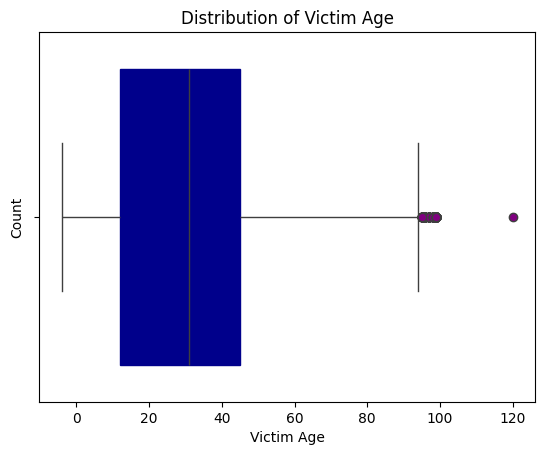

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#plotting victim age

sns.boxplot(x = 'Vict Age', data = df, boxprops=dict(color='darkblue'), flierprops=dict(markerfacecolor='purple', marker='o'))
plt.title('Distribution of Victim Age')
plt.xlabel('Victim Age')
plt.ylabel('Count')
plt.show()


<ipython-input-35-e0b72997fa03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Vict Sex', data=df, palette=palette)
<ipython-input-35-e0b72997fa03>:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.countplot(x='Vict Sex', data=df, palette=palette)


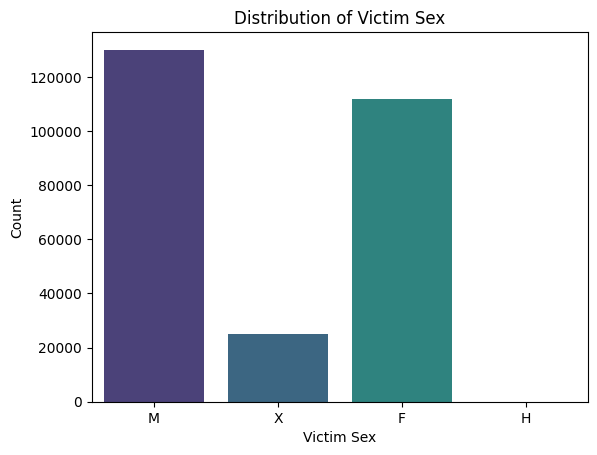

In [ ]:
num_colors = len(df['Vict Sex'].unique())  # Get the number of unique categories
palette = sns.color_palette("viridis", num_colors)  # Generate a color palette with enough colors
sns.countplot(x='Vict Sex', data=df, palette=palette)
plt.title('Distribution of Victim Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Count')
plt.show()

<ipython-input-21-8625bceb9507>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AREA NAME', data=filtered_df, palette=palette)


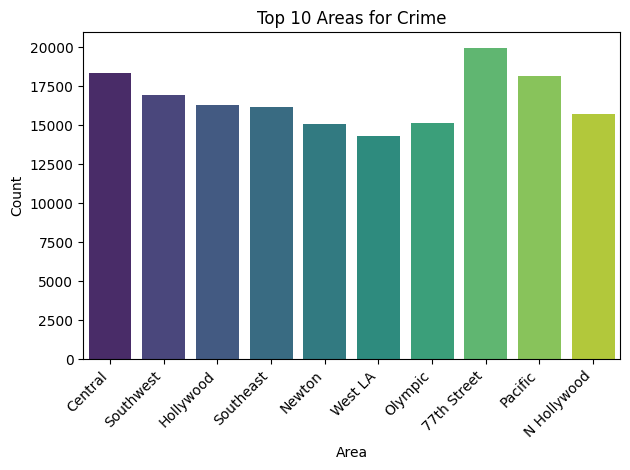

In [ ]:
top_10_areas = df['AREA NAME'].value_counts().nlargest(10).index  # Get the top 10 areas
filtered_df = df[df['AREA NAME'].isin(top_10_areas)]  # Filter the DataFrame


num_colors = len(filtered_df['AREA NAME'].unique())  # Get the number of unique categories
palette = sns.color_palette("viridis", num_colors)  # Generate a color palette with enough colors
sns.countplot(x='AREA NAME', data=filtered_df, palette=palette)
plt.title('Top 10 Areas for Crime')
plt.xlabel('Area')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
df["Date Rptd"] = df["Date Rptd"].str.split().str[0]
df["DATE OCC"] = df["DATE OCC"].str.split().str[0]


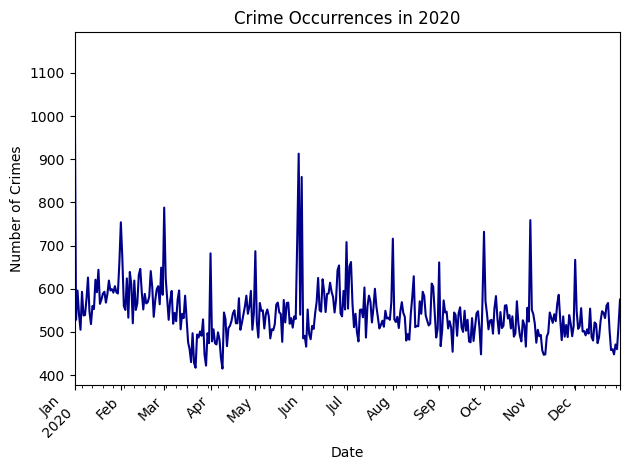

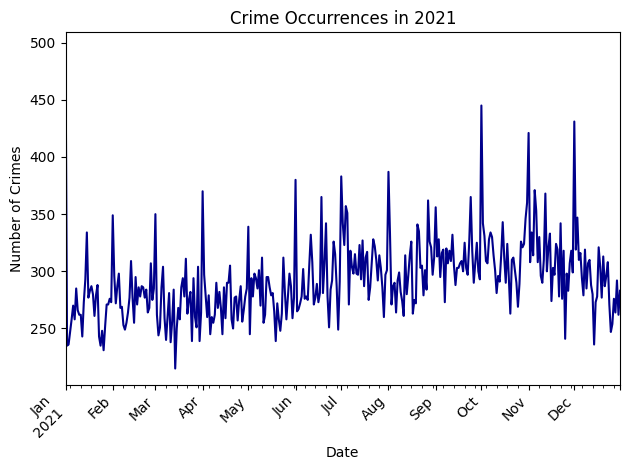

In [ ]:
#making a line plot of date occurred over time

  # Extract the year
if not pd.api.types.is_datetime64_any_dtype(df['DATE OCC']):
    df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y', errors='coerce')

df['Year'] = df['DATE OCC'].dt.year  # Extract the year

for year in df['Year'].unique():
    year_data = df[df['Year'] == year]  # Filter data for the current year
    year_data.groupby('DATE OCC')['DR_NO'].count().plot(kind='line', color ="darkblue")
    plt.title(f'Crime Occurrences in {year}')
    plt.xlabel('Date')
    plt.ylabel('Number of Crimes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
df["DATE OCC"].tail()

,DATE OCC
306823,2021-11-04
306824,2021-10-22
306825,2021-06-01
306826,2021-10-17
306827,2021-11-13


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  DR_NO   No. Observations:                  366
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1571.235
Date:                Mon, 21 Oct 2024   AIC                           3148.470
Time:                        15:31:21   BIC                           3160.169
Sample:                    01-01-2020   HQIC                          3153.119
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0611      0.026      2.345      0.019       0.010       0.112
ma.L1         -0.9607      0.021    -46.123      0.000      -1.001      -0.920
sigma2       318.9988      9.805     32.534      0.0

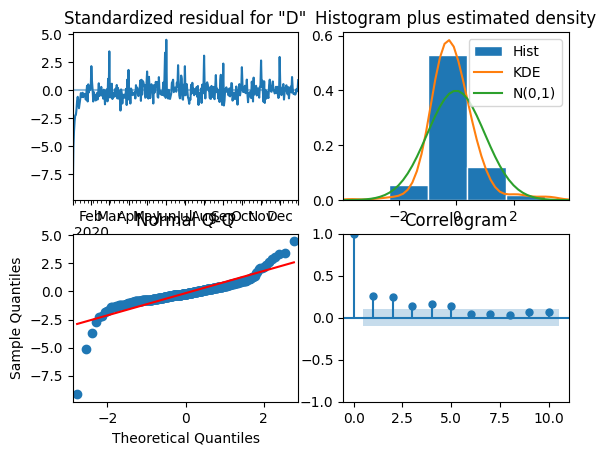

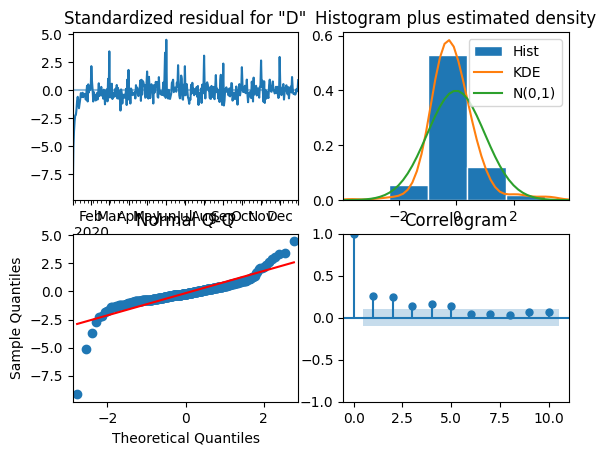

In [ ]:
#https://vivekupadhyay1.medium.com/how-to-forecast-time-series-with-arima-a-step-by-step-guide-31244adc2b71

# Import the ARIMA class
from statsmodels.tsa.arima.model import ARIMA # Changed import to use the new ARIMA class
# Load the sample data
data = df
# Define the order of the ARIMA model
order = (1, 1, 1)
# Create an ARIMA model object
model = ARIMA(data, order=order) # Using the new ARIMA class
# Fit the model to the data
fitted_model = model.fit()
# Print the model summary
print(fitted_model.summary())
# Plot the model diagnostics
fitted_model.plot_diagnostics()

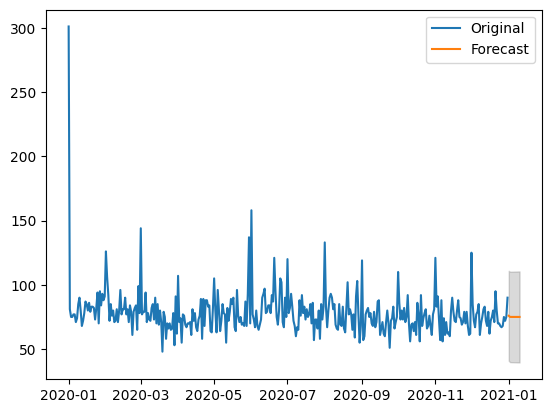

In [ ]:
# Import the pyplot module
import matplotlib.pyplot as plt
# Forecast the next 10 values
forecast = fitted_model.forecast(steps=10)
# Extract the forecasted values
# The original code incorrectly assigned a single value to forecast_values.
# The following line corrects this by assigning the entire forecast array to forecast_values.
forecast_values = forecast # Corrected line
# Extract the confidence interval
forecast_ci = fitted_model.get_forecast(steps=10).conf_int() # Corrected line to get confidence intervals
# Plot the original data
plt.plot(data.index, data.values, label='Original') # Corrected line to use data index and values
# Plot the forecasted values
plt.plot(forecast.index, forecast_values, label='Forecast') # Corrected line to use forecast index and values
# Plot the confidence interval
plt.fill_between(forecast.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=.15) # Corrected line to use forecast index and confidence intervals
# Add a legend
plt.legend()
# Show the plot
plt.show()

In [ ]:
#https://www.datacamp.com/tutorial/random-forests-classifier-python

import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
df['date'] = pd.to_datetime(df['DATE OCC'])  # Convert 'date' column to datetime
df_grouped = df.groupby([df['date'].dt.to_period('M'), 'AREA NAME', "Crm Cd Desc", "Vict Sex", "Vict Descent", "Premis Desc", "Weapon Desc", "Status Desc"]).size().reset_index(name='crime_count')

# Convert the period back to datetime for proper time handling
df_grouped['date'] = df_grouped['date'].dt.to_timestamp()

# Step 2: Define Features and Target
# Features will include the date (month, day, year), location, and any other relevant columns
df_grouped['month'] = df_grouped['date'].dt.month  # Extract month
df_grouped['day'] = df_grouped['date'].dt.day  # Extract day
df_grouped['year'] = df_grouped['date'].dt.year  # Extract year

<ipython-input-11-c02ee8d2afb8>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['DATE OCC'])  # Convert 'date' column to datetime


In [ ]:
df_grouped.head()

,date,AREA NAME,Crm Cd Desc,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,crime_count,month,day,year
0,2020-01-01,77th Street,ARSON,M,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",FIRE,Invest Cont,1,1,1,2020
1,2020-01-01,77th Street,ARSON,M,H,STREET,FIRE,Invest Cont,1,1,1,2020
2,2020-01-01,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",F,A,STREET,AIR PISTOL/REVOLVER/RIFLE/BB GUN,Invest Cont,1,1,1,2020
3,2020-01-01,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",F,B,ALLEY,HAND GUN,Invest Cont,1,1,1,2020
4,2020-01-01,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",F,B,GAS STATION,BOTTLE,Adult Other,1,1,1,2020


In [ ]:
features = ['AREA NAME', "Crm Cd Desc", "Vict Sex", "Vict Descent", "Premis Desc", "Weapon Desc", "Status Desc"]
X = df_grouped[features]
y = df_grouped['crime_count']

X = pd.get_dummies(X, columns=['AREA NAME', "Crm Cd Desc", "Vict Sex", "Vict Descent", "Premis Desc", "Weapon Desc", "Status Desc"], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Train Random Forest Model - Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Predictions and Model Evaluation
y_pred = rf_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Random Forest RMSE: {rmse}')

Random Forest RMSE: 0.562327403352614


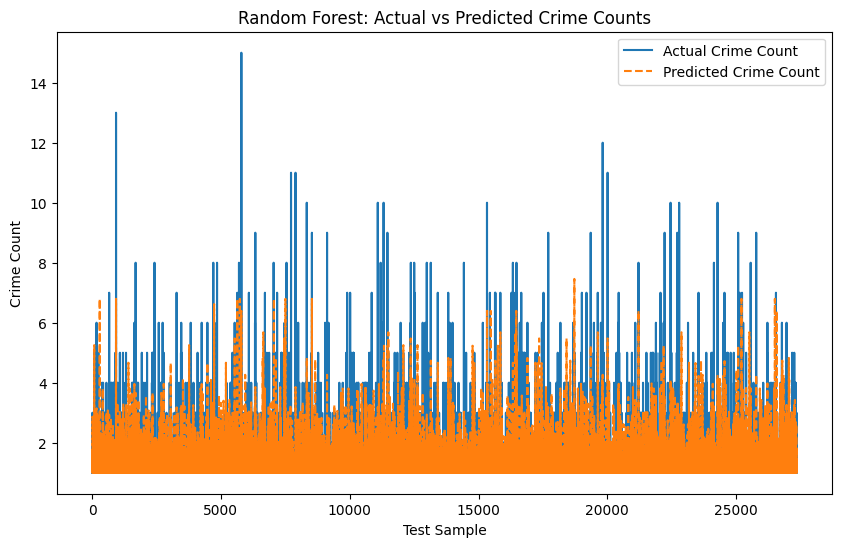

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 6: Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Crime Count')
plt.plot(y_pred, label='Predicted Crime Count', linestyle='--')
plt.title('Random Forest: Actual vs Predicted Crime Counts')
plt.xlabel('Test Sample')
plt.ylabel('Crime Count')
plt.legend()
plt.show()

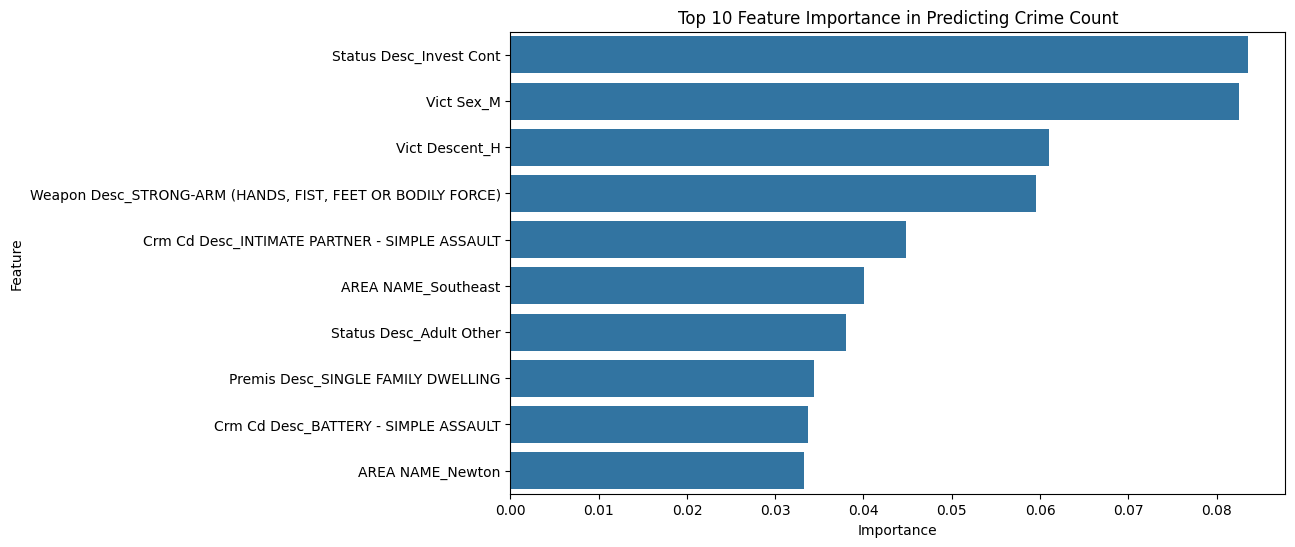

In [ ]:
# Step 7: Feature Importance
feature_importances = rf_model.feature_importances_
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Sort by importance and take the top 10
top_features_df = features_df.sort_values(by='Importance', ascending=False).head(10)

# Plot Importance (Top 10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features_df)
plt.title('Top 10 Feature Importance in Predicting Crime Count')
plt.show()